In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('Task_2/x_train.csv').values
X_test = pd.read_csv('Task_2/x_test.csv').values
y_train = pd.read_csv('Task_2/y_train.csv').values
y_test = pd.read_csv('Task_2/y_test.csv').values

In [3]:
num_classes = 4  # Adjust based on the number of classes in your dataset
y_train = to_categorical(y_train.flatten(), num_classes)
y_test = to_categorical(y_test.flatten(), num_classes)

In [4]:

# Learning rates to test
learning_rates = [1., 0.1, 0.001]

In [5]:
# Results storage
histories = []

In [6]:
for lr in learning_rates:
    # Define the neural network architecture
    model = Sequential([
        Dense(100, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with 100 nodes
        Dense(40, activation='relu'),  # Second hidden layer with 40 nodes
        Dense(num_classes, activation='softmax')  # Output layer with 4 nodes
    ])

     # Compile the model with the current learning rate
    model.compile(optimizer=SGD(learning_rate=lr), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    print(f"Training with learning rate: {lr}")
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=1)
    histories.append((lr, history))

Training with learning rate: 1.0
Epoch 1/200


c:\Users\Deshitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4830 - loss: 1.0881 - val_accuracy: 0.7082 - val_loss: 0.7076
Epoch 2/200
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.7220 - loss: 0.6634 - val_accuracy: 0.7308 - val_loss: 0.6560
Epoch 3/200
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.7638 - loss: 0.5645 - val_accuracy: 0.7619 - val_loss: 0.5264
Epoch 4/200
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7876 - loss: 0.5202 - val_accuracy: 0.7161 - val_loss: 0.6938
Epoch 5/200
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7874 - loss: 0.5106 - val_accuracy: 0.7534 - val_loss: 0.6096
Epoch 6/200
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8057 - loss: 0.5275 - val_accuracy: 0.7891 - val_loss: 0.5316
Epoch 7/200
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8000 - loss: 0.5294 - val_accuracy: 0.7955 - val_loss: 0.4714
Epoch 8/200
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8080 - loss: 0.4915 - val_accura

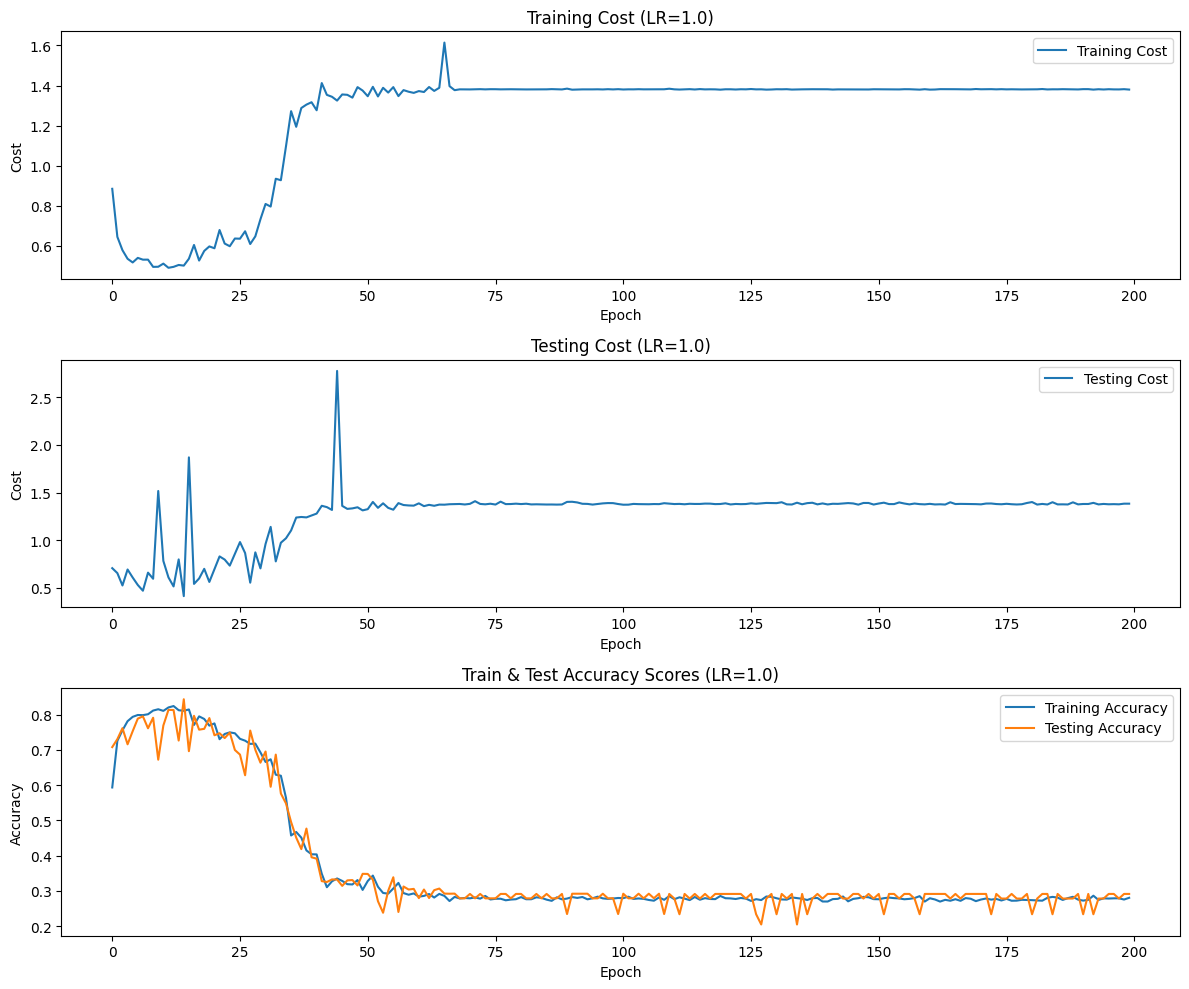

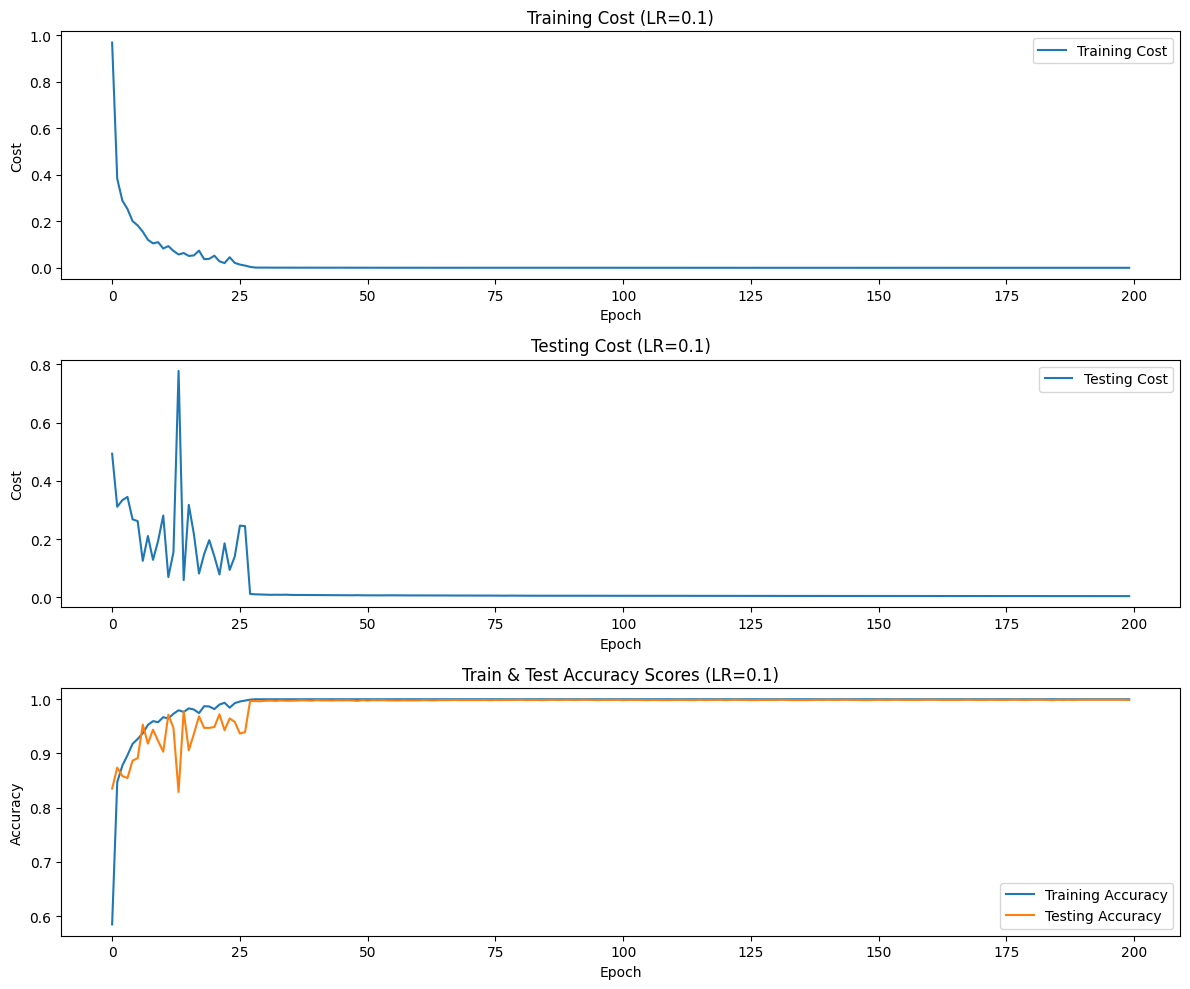

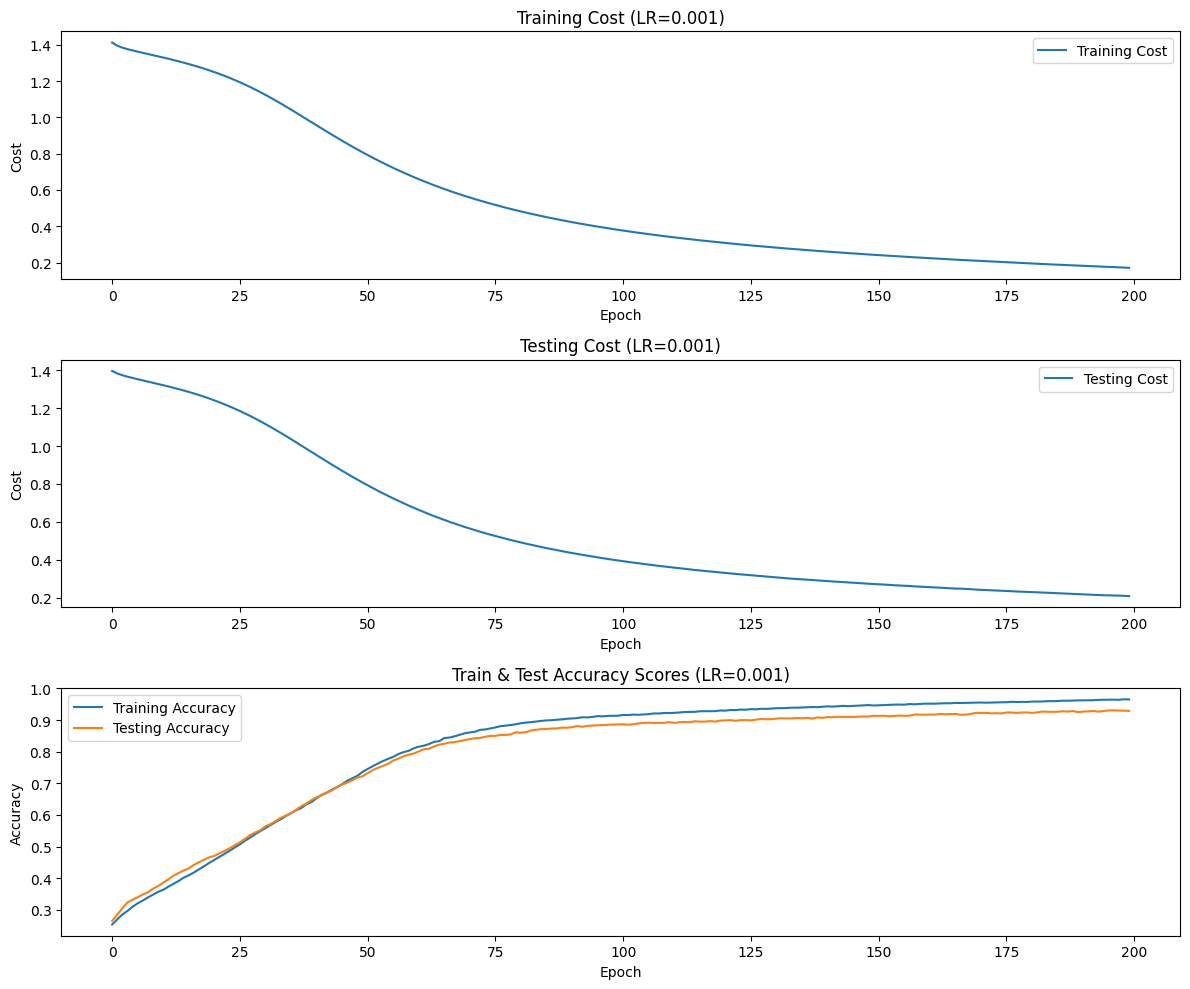

In [7]:
# Plotting for each learning rate
for lr, history in histories:
    plt.figure(figsize=(12, 10))

    # Plot Training Cost
    plt.subplot(3, 1, 1)
    plt.plot(history.history['loss'], label='Training Cost')
    plt.title(f'Training Cost (LR={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.legend()

    # Plot Testing Cost
    plt.subplot(3, 1, 2)
    plt.plot(history.history['val_loss'], label='Testing Cost')
    plt.title(f'Testing Cost (LR={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.legend()

    # Plot Training and Testing Accuracy
    plt.subplot(3, 1, 3)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
    plt.title(f'Train & Test Accuracy Scores (LR={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()